## CPLS - breast dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### breast dataset

In [2]:
#alcools dataset
from discrimintools.datasets import load_dataset
D = load_dataset("breast")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ucellsize  699 non-null    int64 
 1   normnucl   699 non-null    int64 
 2   mitoses    699 non-null    int64 
 3   Class      699 non-null    object
dtypes: int64(3), object(1)
memory usage: 22.0+ KB


In [3]:
#split into X and y
y, X = D["Class"], D.drop(columns=["Class"])

### Instanciation and training

In [4]:
#instanciation and training
from discrimintools import CPLS
clf = CPLS()
clf.fit(X,y)

,n_components,2
,scale,True
,classes,None
,max_iter,500
,tol,1e-10
,var_select,False
,threshold,1.0
,warn_message,True


#### Coefficients

In [5]:
#coefficients
print(clf.coef_.to_frame())

           positive
Constant  -0.424881
ucellsize  0.085323
normnucl   0.053251
mitoses    0.003001


#### Summary

In [6]:
#summary
from discrimintools import summaryCPLS
summaryCPLS(clf,detailed=True)

                     Partial Least Squares for Classification - Results                     

Class Level Information:
          Frequency  Proportion  Prior Probability
negative        458      0.6552             0.6552
positive        241      0.3448             0.3448

Importance of PLS components:
      Proportion (%)  Cumulative (%)
Can1         69.1520         69.1520
Can2         20.1981         89.3501

Classification functions coefficients:
           positive     VIP
Constant    -0.4249     NaN
ucellsize    0.0853  1.2038
normnucl     0.0533  1.0346
mitoses      0.0030  0.6933

Classification Summary for Calibration Data:

Observation Profile:
                        Read  Used
Number of Observations   699   699

Number of Observations Classified into Class:
prediction  negative  positive  Total
Class                                
negative         440        18    458
positive          26       215    241
Total            466       233    699

Percent Classified into Class:

### Plotting

In [7]:
#plotting
from discrimintools import fviz_plsr

#### Graph of individuals

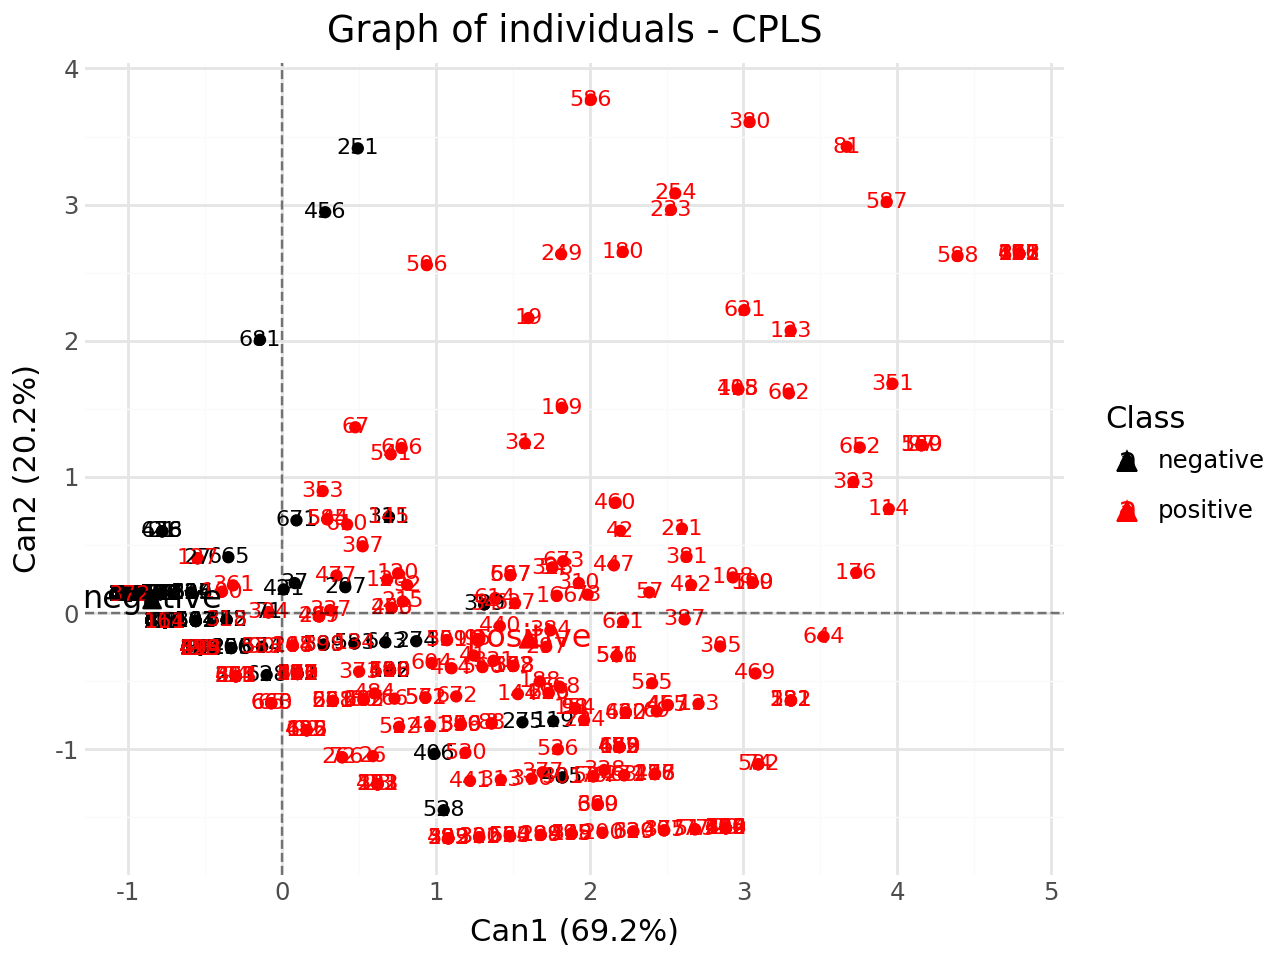

In [8]:
#graph of individuals
p = fviz_plsr(clf,element="ind",repel=False)
p.show()

#### Graph of variables

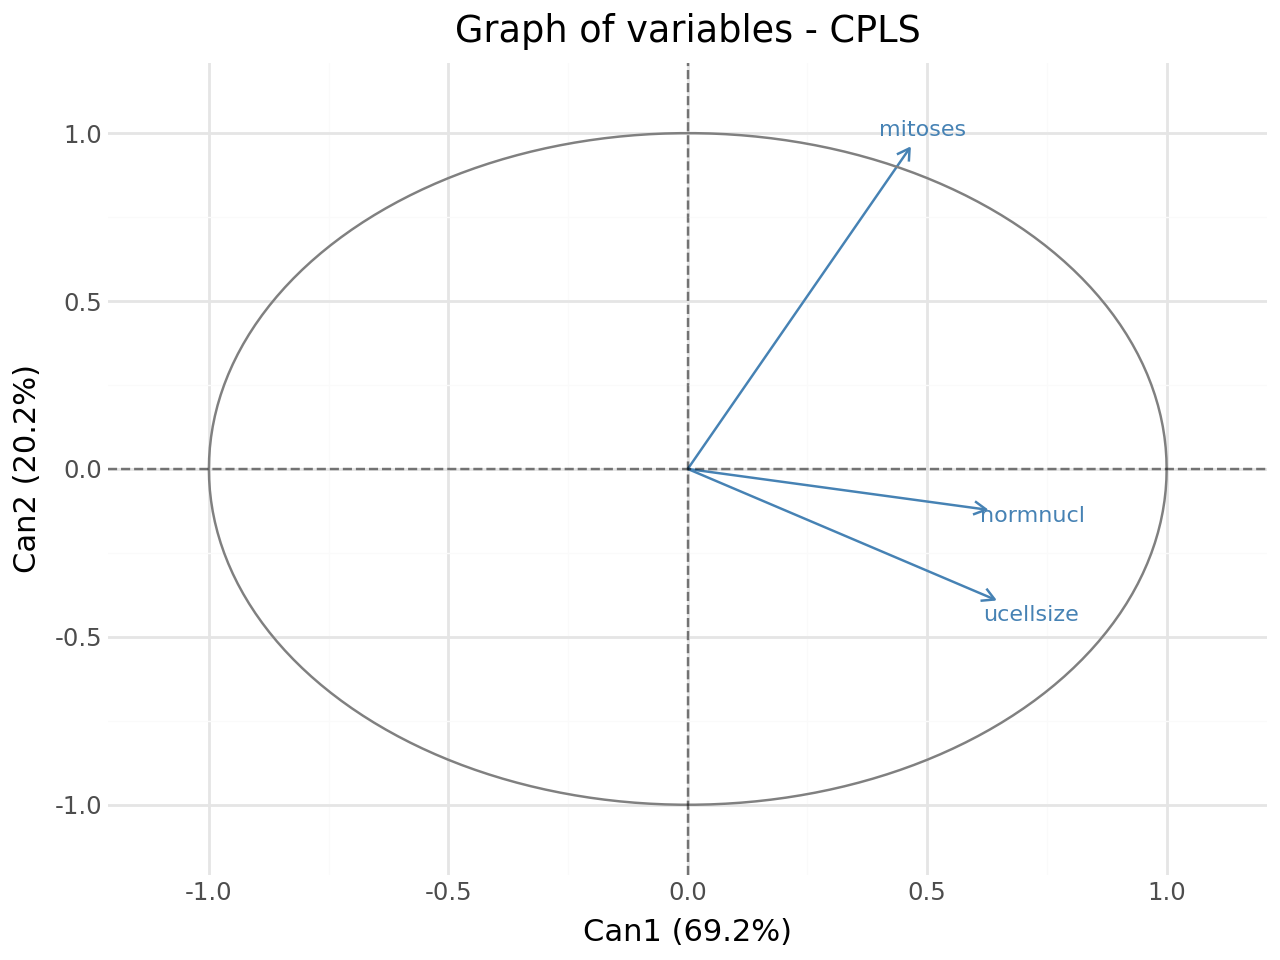

In [9]:
#graph of variables
p = fviz_plsr(clf,element="var",repel=True)
p.show()

#### Distance between barycenter

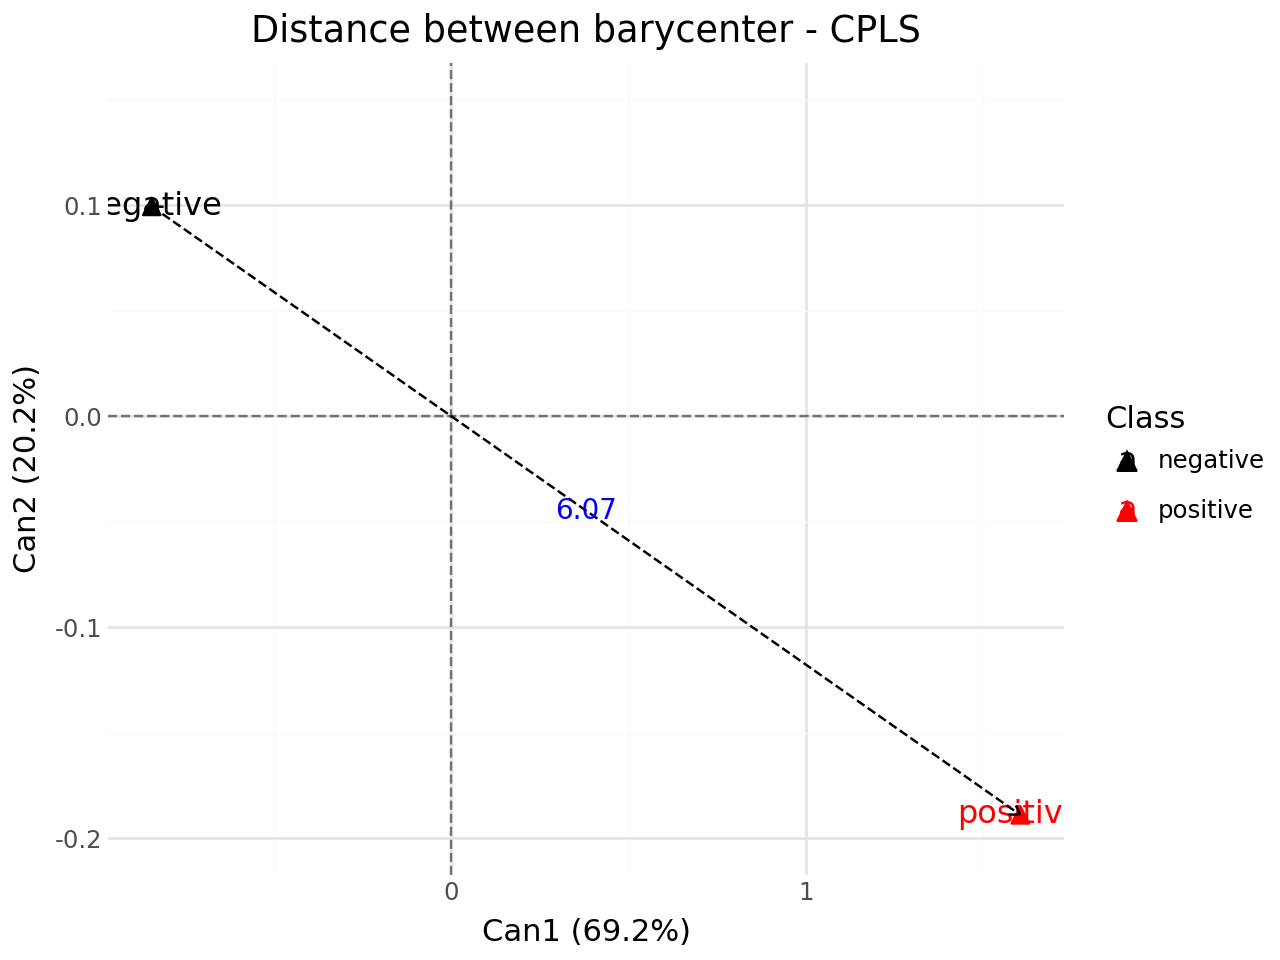

In [10]:
#distance between barycenter
p = fviz_plsr(clf,element="dist",repel=False,y_lim=(-0.2,0.15))
p.show()